# Reddit Analysis using Pushshift API

## Part 3: Exploratory Data Analysis
- [Analysis of r/raisedbynarcissists](#Analysis-of-r/raisedbynarcissists)
- [Analysis of r/TalesFromRetail](#Analysis-of-r/TalesFromRetail)
- [Complete Data Analysis](#Complete-Data-Analysis)
- [Additional Stop Word Analysis](#Additional-Stop-Word-Analysis)

In [1]:
# Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Get datasets
df = pd.read_csv('./data/cleaned.csv', lineterminator='\n', index_col=0)
dfR = pd.read_csv('./data/clean_retail.csv', lineterminator='\n', index_col=0)
dfN = pd.read_csv('./data/clean_narc.csv', lineterminator='\n', index_col=0)

In [3]:
df.shape, dfN.shape, dfR.shape

((1882, 6), (923, 6), (959, 6))

# Analysis of r/raisedbynarcissists

In [5]:
dfN.num_comments.mean(), dfR.num_comments.mean()

(10.570964247020585, 44.284671532846716)

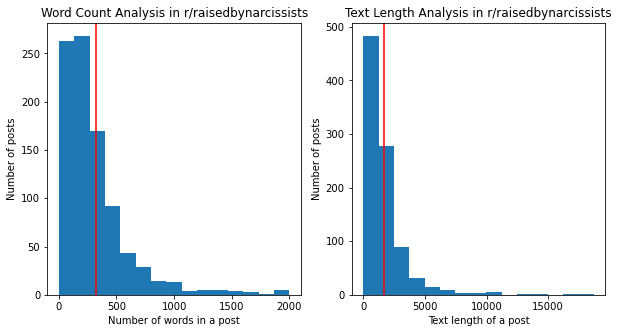

In [5]:
# EDA on raisedbynarcissists
fig, ax = plt.subplots(1, 2, figsize = (10,5))

# Word count analysis
ax[0].hist(dfN.word_count, bins = 15, range = (0,2000));
ax[0].set_xlabel('Number of words in a post')
ax[0].set_ylabel('Number of posts')
ax[0].set_title('Word Count Analysis in r/raisedbynarcissists')
ax[0].axvline(x = dfN.word_count.mean(), c = 'r')

# Text length analysis
ax[1].hist(dfN.text_len, bins = 15)
ax[1].set_xlabel('Text length of a post')
ax[1].set_ylabel('Number of posts')
ax[1].set_title('Text Length Analysis in r/raisedbynarcissists')
ax[1].axvline(x = dfN.text_len.mean(), c = 'r');

In [22]:
# Use CountVectorizer to see if there are any strict giveaway words

# Fit and initiate
cv_test = CountVectorizer(stop_words = 'english')

# Created dataframe of words
dfN_cv = pd.DataFrame(cv_test.fit_transform(dfN.text).todense(),
                      columns= cv_test.get_feature_names())

# Order words in terms of importance
dfN_sort = pd.DataFrame(dfN_cv.T.sum(axis = 1)).sort_values(0, ascending = False).T

# Top 20 words
dfN_sort.iloc[:,:20]

,just,like,im,mom,time,know,feel,parents,dont,dad,told,want,things,said,life,really,mother,family,years,going
0,1624,1439,1142,996,864,857,824,798,755,663,662,640,623,615,589,580,559,557,519,506


In [27]:
# Extra stop words used in next part
dfN_sort.iloc[:,:20].columns

Index(['just', 'like', 'im', 'mom', 'time', 'know', 'feel', 'parents', 'dont',
       'dad', 'told', 'want', 'things', 'said', 'life', 'really', 'mother',
       'family', 'years', 'going'],
      dtype='object')

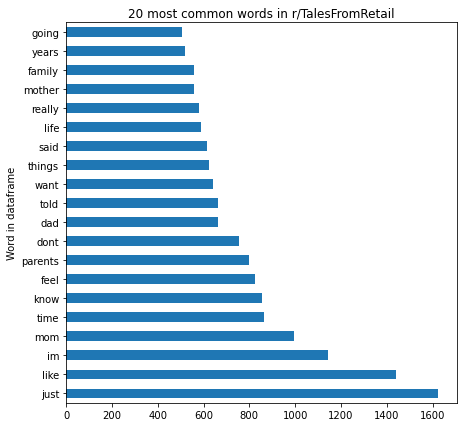

In [39]:
dfN_cv.sum().sort_values(ascending = False).head(20).plot(kind = 'barh',
                                                         figsize = (7, 7),
                                                         xlabel = 'Word in dataframe',
                                                         ylabel = 'Number of instances',
                                                         title = '20 most common words in r/TalesFromRetail');

# Analysis of TalesFromRetail

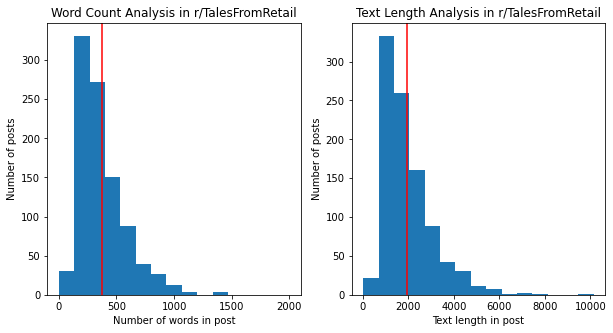

In [7]:
# EDA on TalesFromRetail
fig, ax = plt.subplots(1, 2, figsize = (10,5))

# Word count analysis
ax[0].hist(dfR.word_count, bins = 15, range = (0,2000));
ax[0].set_xlabel('Number of words in post')
ax[0].set_ylabel('Number of posts')
ax[0].set_title('Word Count Analysis in r/TalesFromRetail')
ax[0].axvline(x = dfR.word_count.mean(), c = 'r')

# Text length analysis
ax[1].hist(dfR.text_len, bins = 15)
ax[1].set_xlabel('Text length in post')
ax[1].set_ylabel('Number of posts')
ax[1].set_title('Text Length Analysis in r/TalesFromRetail')
ax[1].axvline(x = dfR.text_len.mean(), c = 'r');

In [68]:
# Use CountVectorizer to see if there are any strict giveaway words

# Fit and initiate
cv_test = CountVectorizer(stop_words = 'english')

# Created dataframe of words
dfR_cv = pd.DataFrame(cv_test.fit_transform(dfR.text).todense(),
                      columns= cv_test.get_feature_names())

# Order words in terms of importance
dfR_sort = pd.DataFrame(dfR_cv.T.sum(axis = 1)).sort_values(0, ascending = False).T

# Top 20 words
dfR_sort.iloc[:,:20]

,just,store,customer,like,im,time,manager,said,know,work,told,dont,people,day,lady,customers,going,got,did,tell
0,1856,1820,1223,1101,948,913,877,850,837,833,752,679,675,672,635,634,557,548,526,523


In [25]:
# Extra stop words used in next part
dfR_sort.iloc[:,:20].columns

Index(['just', 'store', 'customer', 'like', 'im', 'time', 'manager', 'said',
       'know', 'work', 'told', 'dont', 'people', 'day', 'lady', 'customers',
       'going', 'got', 'did', 'tell'],
      dtype='object')

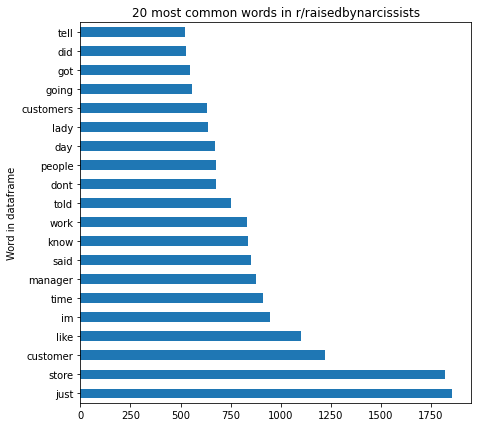

In [38]:
dfR_cv.sum().sort_values(ascending = False).head(20).plot(kind = 'barh',
                                                         figsize = (7, 7),
                                                         xlabel = 'Word in dataframe',
                                                         ylabel = 'Number of instances',
                                                         title = '20 most common words in r/raisedbynarcissists');

# Complete Data Analysis

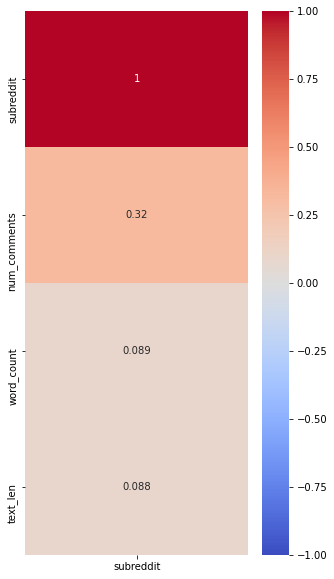

In [9]:
# Preliminary feature presentation
plt.figure(figsize = (5, 10))
sns.heatmap(df.corr()[['subreddit']].sort_values('subreddit', ascending = False),
            annot = True,
            cmap = 'coolwarm',
            vmin = -1, vmax = 1);

In [32]:
df.describe()

,subreddit,num_comments,text_len,word_count
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,0.509564,27.750266,1811.876196,344.831562
std,0.500041,53.202554,1510.593647,288.316066
min,0.000000,0.000000,11.000000,2.000000
25%,0.000000,2.000000,910.500000,174.000000
50%,1.000000,8.000000,1455.000000,280.000000
75%,1.000000,28.000000,2298.500000,437.750000
max,1.000000,764.000000,18690.000000,3687.000000


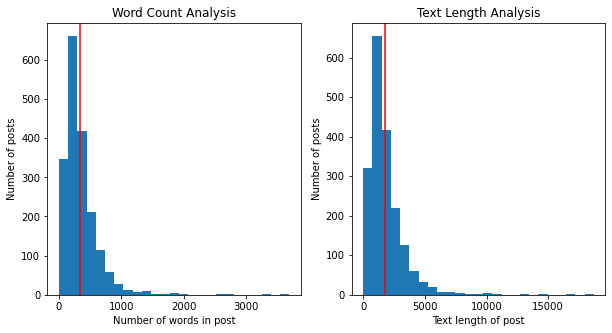

In [61]:
# EDA on entire dataframe
fig, ax = plt.subplots(1, 2, figsize = (10,5))

# Word count analysis
ax[0].hist(df.word_count, bins = 25);
ax[0].set_xlabel('Number of words in post')
ax[0].set_ylabel('Number of posts')
ax[0].set_title('Word Count Analysis')
ax[0].axvline(x = df.word_count.mean(), c = 'r')

# Text length analysis
ax[1].hist(df.text_len, bins = 25)
ax[1].set_xlabel('Text length of post')
ax[1].set_ylabel('Number of posts')
ax[1].set_title('Text Length Analysis')
ax[1].axvline(x = df.text_len.mean(), c = 'r');

In [10]:
# Use CountVectorizer to see if there are any strict giveaway words

# Fit and initiate
cv_test = CountVectorizer(stop_words = 'english')

# Created dataframe of words
df_cv = pd.DataFrame(cv_test.fit_transform(df.text).todense(),
                      columns= cv_test.get_feature_names())

# Order words in terms of importance
df_sort = pd.DataFrame(df_cv.T.sum(axis = 1)).sort_values(0, ascending = False).T

# Top 20 words
df_sort.iloc[:,:20]

,just,like,im,store,time,know,said,dont,told,customer,want,people,work,mom,going,day,did,got,really,feel
0,3480,2540,2090,1845,1777,1694,1465,1434,1414,1224,1150,1127,1111,1091,1063,1046,1025,1019,976,974


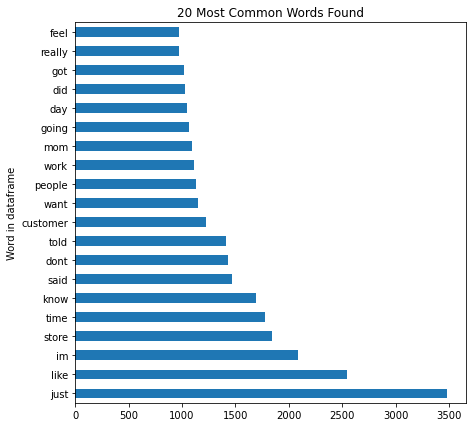

In [41]:
# Visualization of 20 most common words
df_cv.sum().sort_values(ascending = False).head(20).plot(kind = 'barh',
                                                         figsize = (7, 7),
                                                         xlabel = 'Word in dataframe',
                                                         ylabel = 'Number of instances',
                                                         title = '20 Most Common Words Found');

In [12]:
# Bigram analysis
bi_cv = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bi_cv.fit(df.text)
bigrams = bi_cv.transform(df.text)

bi_df = pd.DataFrame(bigrams.todense(), columns = bi_cv.get_feature_names())
bi_df.sum().sort_values(ascending = False).head(20)

feel like           296
dont know           267
years ago           170
dont want           159
amp xb              151
don know            138
im sorry            136
customer service    131
year old            124
grocery store       118
monkey monkey       107
didnt want           93
im just              82
im sure              81
just want            81
minutes later        79
im going             78
let know             78
make sure            76
years old            75
dtype: int64

In [13]:
# Trigram analysis
tri_cv = CountVectorizer(ngram_range=(3, 3), stop_words='english')
tri_cv.fit(df.text)
trigrams = tri_cv.transform(df.text)

tri_df = pd.DataFrame(trigrams.todense(), columns = tri_cv.get_feature_names())
tri_df.sum().sort_values(ascending = False).head(20)

monkey monkey monkey     106
blah blah blah            23
long story short          23
work grocery store        22
feel like im              19
make feel like            18
happened years ago        18
year old sister           17
couple years ago          17
customer service desk     16
im sorry maam             14
work gas station          13
long time ago             13
just feel like            12
years ago working         11
local grocery store       11
really dont know          11
www reddit com            10
years ago worked          10
saying things like        10
dtype: int64

# Additional Stop Word Analysis

In [14]:
# Monkey
df[df.text.str.contains('monkey monkey monkey')]

,id,subreddit,num_comments,text,text_len,word_count
173,oky6fg,1,0,Stop hanging up on me Monkey monkey monkey mo...,805,100


In [55]:
df[df.text.str.contains('flying monkey')]

,id,subreddit,num_comments,text,text_len,word_count
1199,p8v0nx,0,2,Escape Plan So I have realized I have been sev...,2039,377
1294,p8iruz,0,9,Avoiding Important Events Does anyone else wan...,1768,334
1295,p8in1k,0,5,Flying monkey Finally got a word for it thanks...,1784,331
1371,p8anaj,0,6,I cant trust even therapists I cant trust even...,121,21
1389,p88w47,0,2,Cutting off my edad I decided to cut off my e...,598,117
1405,p86ysw,0,4,DAE have a Flying monkey enabler parent I am ...,2060,393
1424,p84dwn,0,177,My year old floored me today with his emotion...,1962,374
1554,p7jv0c,0,4,Finally went NC I finally blocked my parent...,889,179
1575,p7htoz,0,2,How should I handle the flying monkeys in my f...,2252,405
1754,p6usbn,0,4,nParent using eSibs to infantilize me I’m NC w...,1016,184


In [53]:
df.text[173]

'Stop hanging up on me  Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey Monkey monkey monkey monkey'

In [69]:
dfR_sort.iloc[:,14:30] # lady 20% more than guy

,lady,customers,going,got,did,tell,guy,want,didnt,asked,came,help,right,come,comes,items
0,635,634,557,548,526,523,515,510,496,481,478,476,471,460,449,445


In [73]:
dfR_sort.iloc[:,30:50] # woman 20% more than man

,need,say,register,working,woman,card,really,phone,went,says,look,ask,minutes,happened,way,make,check,man,sorry,trying
0,428,428,425,425,417,415,396,389,388,388,388,386,378,370,357,356,354,352,351,346


In [63]:
dfR_sort.iloc[:,:50].columns

Index(['just', 'store', 'customer', 'like', 'im', 'time', 'manager', 'said',
       'know', 'work', 'told', 'dont', 'people', 'day', 'lady', 'customers',
       'going', 'got', 'did', 'tell', 'guy', 'want', 'didnt', 'asked', 'came',
       'help', 'right', 'come', 'comes', 'items', 'need', 'say', 'register',
       'working', 'woman', 'card', 'really', 'phone', 'went', 'says', 'look',
       'ask', 'minutes', 'happened', 'way', 'make', 'check', 'man', 'sorry',
       'trying'],
      dtype='object')

In [64]:
dfN_sort.iloc[:,:50].columns

Index(['just', 'like', 'im', 'mom', 'time', 'know', 'feel', 'parents', 'dont',
       'dad', 'told', 'want', 'things', 'said', 'life', 'really', 'mother',
       'family', 'years', 'going', 'did', 'got', 'people', 'way', 'think',
       'don', 'didnt', 'home', 'say', 'house', 'make', 'day', 'help', 'ive',
       'sister', 'need', 'tell', 'year', 'having', 'bad', 'school', 'trying',
       'went', 'good', 'care', 'talk', 'away', 'nmom', 'friends', 'abuse'],
      dtype='object')